In [1]:
# !pip install pandas

# Data Manipulation with Pandas
In the previous section, we dove into detail on NumPy and its ndarray object, which provides efficient storage and manipulation of dense typed arrays in Python. Here we'll build on this knowledge by looking in detail at the data structures provided by the Pandas library. Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a DataFrame. DataFrames are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data. As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

As we saw, NumPy's ndarray data structure provides essential features for the type of clean, well-organized data typically seen in numerical computing tasks. While it serves this purpose very well, its limitations become clear when we need more flexibility (e.g., attaching labels to data, working with missing data, etc.) and when attempting operations that do not map well to element-wise broadcasting (e.g., groupings, pivots, etc.), each of which is an important piece of analyzing the less structured data available in many forms in the world around us. Pandas, and in particular its Series and DataFrame objects, builds on the NumPy array structure and provides efficient access to these sorts of "data munging" tasks that occupy much of a data scientist's time.

In this section, we will focus on the mechanics of using Series, DataFrame, and related structures effectively. We will use examples drawn from real datasets where appropriate, but these examples are not necessarily the focus.

In [2]:
import pandas
pandas.__version__

'1.3.3'

In [3]:
import pandas as pd


# Introducing Pandas Objects

At the very basic level, Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices. As we will see during the course of this chapter, Pandas provides a host of useful tools, methods, and functionality on top of the basic data structures, but nearly everything that follows will require an understanding of what these structures are. Thus, before we go any further, let's introduce these three fundamental Pandas data structures: the Series, DataFrame, and Index.

In [4]:
import numpy as np
import pandas as pd

#  The Pandas Series Object

A Pandas Series is a one-dimensional array of indexed data. It can be created from a list or array as follows:


In [5]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

As we see in the output, the Series wraps both a sequence of values and a sequence of indices, which we can access with the values and index attributes. The values are simply a familiar NumPy array:

In [6]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [7]:
data.index

RangeIndex(start=0, stop=4, step=1)

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [8]:
data[1]

0.5

In [9]:
data[1:3]

1    0.50
2    0.75
dtype: float64

# Series as generalized NumPy array

From what we've seen so far, it may look like the Series object is basically interchangeable with a one-dimensional NumPy array. The essential difference is the presence of the index: while the Numpy Array has an implicitly defined integer index used to access the values, the Pandas Series has an explicitly defined index associated with the values.

This explicit index definition gives the Series object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type. For example, if we wish, we can use strings as an index:


In [10]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data



a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [11]:
data['b']

0.5

In [12]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data



2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [13]:
data[5]

0.5

# Series as specialized dictionary

In this way, you can think of a Pandas Series a bit like a specialization of a Python dictionary. A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a Series is a structure which maps typed keys to a set of typed values. This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas Series makes it much more efficient than Python dictionaries for certain operations.

The Series-as-dictionary analogy can be made even more clear by constructing a Series object directly from a Python dictionary:


In [14]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [15]:
population['California']

38332521

In [18]:
population['California':'New York']



California    38332521
Texas         26448193
New York      19651127
dtype: int64


# Constructing Series objects

We've already seen a few ways of constructing a Pandas Series from scratch; all of them are some version of the following:

pd.Series(data, index=index)

where index is an optional argument, and data can be one of many entities.

For example, data can be a list or NumPy array, in which case index defaults to an integer sequence:


In [19]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [20]:
pd.Series(5, index=[100, 200, 300])



100    5
200    5
300    5
dtype: int64

In [21]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In [22]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object


# The Pandas DataFrame Object

The next fundamental structure in Pandas is the DataFrame. Like the Series object discussed in the previous section, the DataFrame can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary. We'll now take a look at each of these perspectives.

# DataFrame as a generalized NumPy array

If a Series is an analog of a one-dimensional array with flexible indices, a DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names. Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a DataFrame as a sequence of aligned Series objects. Here, by "aligned" we mean that they share the same index.

To demonstrate this, let's first construct a new Series listing the area of each of the five states discussed in the previous section:


In [23]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area



California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

Now that we have this along with the population Series from before, we can use a dictionary to construct a single two-dimensional object containing this information:

In [24]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [25]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [26]:
states.columns

Index(['population', 'area'], dtype='object')

Thus the DataFrame can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.


# DataFrame as specialized dictionary

Similarly, we can also think of a DataFrame as a specialization of a dictionary. Where a dictionary maps a key to a value, a DataFrame maps a column name to a Series of column data. For example, asking for the 'area' attribute returns the Series object containing the areas we saw earlier:


In [27]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [28]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [29]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)



,a,b
0,0,0
1,1,2
2,2,4


In [30]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])



,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [31]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])



,foo,bar
a,0.093278,0.633531
b,0.646577,0.305744
c,0.149510,0.415584


In [32]:


A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A



array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [33]:


pd.DataFrame(A)



,A,B
0,0,0.0
1,0,0.0
2,0,0.0


# The Pandas Index Object

We have seen here that both the Series and DataFrame objects contain an explicit index that lets you reference and modify data. This Index object is an interesting structure in itself, and it can be thought of either as an immutable array or as an ordered set (technically a multi-set, as Index objects may contain repeated values). Those views have some interesting consequences in the operations available on Index objects. As a simple example, let's construct an Index from a list of integers:


In [34]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [35]:
ind[1]

3

In [36]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [37]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [39]:
# ind[1] = 0

In [40]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])



In [41]:
indA & indB  # intersection



C:\Users\USER\AppData\Local\Temp/ipykernel_12432/1686435237.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  indA & indB  # intersection


Int64Index([3, 5, 7], dtype='int64')

In [42]:
indA.intersection(indB)

Int64Index([3, 5, 7], dtype='int64')

In [43]:
indA | indB  # union

C:\Users\USER\AppData\Local\Temp/ipykernel_12432/2015131817.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  indA | indB  # union


Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [44]:
indA.union(indB)

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [45]:
indA ^ indB  # symmetric difference

C:\Users\USER\AppData\Local\Temp/ipykernel_12432/1234474844.py:1: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead
  indA ^ indB  # symmetric difference


Int64Index([1, 2, 9, 11], dtype='int64')

In [46]:
indA.symmetric_difference(indB)

Int64Index([1, 2, 9, 11], dtype='int64')

In [47]:
pwd

'C:\\Users\\USER\\Python Class'

# Data Indexing and Selection

In Case of Numpy, we looked in detail at methods and tools to access, set, and modify values in NumPy arrays. These included indexing (e.g., arr[2, 1]), slicing (e.g., arr[:, 1:5]), masking (e.g., arr[arr > 0]), fancy indexing (e.g., arr[0, [1, 5]]), and combinations thereof (e.g., arr[:, [1, 5]]). Here we'll look at similar means of accessing and modifying values in Pandas Series and DataFrame objects. If you have used the NumPy patterns, the corresponding patterns in Pandas will feel very familiar, though there are a few quirks to be aware of.

We'll start with the simple case of the one-dimensional Series object, and then move on to the more complicated two-dimesnional DataFrame object.

# Data Selection in Series

As we saw in the previous section, a Series object acts in many ways like a one-dimensional NumPy array, and in many ways like a standard Python dictionary. If we keep these two overlapping analogies in mind, it will help us to understand the patterns of data indexing and selection in these arrays.


# Series as dictionary

Like a dictionary, the Series object provides a mapping from a collection of keys to a collection of values:


In [48]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [49]:
data['b']



0.5

In [50]:
'a' in data

True

In [51]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [52]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

Series objects can even be modified with a dictionary-like syntax. Just as you can extend a dictionary by assigning to a new key, you can extend a Series by assigning to a new index value:

In [53]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [54]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [55]:
# slicing by implicit integer index
data[0:2]



a    0.25
b    0.50
dtype: float64

In [56]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [57]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64


# Indexers: loc, iloc

These slicing and indexing conventions can be a source of confusion. For example, if your Series has an explicit integer index, an indexing operation such as data[1] will use the explicit indices, while a slicing operation like data[1:3] will use the implicit Python-style index.


In [58]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data



1    a
3    b
5    c
dtype: object

In [59]:
# explicit index when indexing
data[1]



'a'

In [60]:
# implicit index when slicing
data[1:3]



3    b
5    c
dtype: object

In [61]:
data

1    a
3    b
5    c
dtype: object

First, the loc attribute allows indexing and slicing that always references the explicit index:

In [62]:
data.loc[1]

'a'

In [63]:
data.loc[1:3]



1    a
3    b
dtype: object

The iloc attribute allows indexing and slicing that always references the implicit Python-style index:

In [64]:
data.iloc[1]



'b'

In [65]:
data.iloc[1:3]

3    b
5    c
dtype: object

# Data Selection in DataFrame


In [66]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data



,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [67]:
data['area']



California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [68]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [69]:
data.area is data['area']

True

In [70]:
data.pop is data['pop']

False

In [71]:
data.pop 

<bound method DataFrame.pop of               area       pop
California  423967  38332521
Texas       695662  26448193
New York    141297  19651127
Florida     170312  19552860
Illinois    149995  12882135>

In [72]:
data['pop']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: pop, dtype: int64

In [73]:
data['density'] = data['pop'] / data['area']
data



,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [74]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [75]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [76]:
data.values[0]



array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [77]:
data['area']



California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [78]:
data.iloc[:3, :2]



,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [79]:
data.loc[:'New York', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [80]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [81]:
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [82]:
data.iloc[0, 2]

90.41392608386974

In [83]:
data.iloc[0, 2] = 90

In [84]:
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [85]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [86]:
data[3:]

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [87]:
data[data.density>100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


# Operating on Data in Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser



0    6
1    3
2    7
3    4
dtype: int32

In [3]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df



,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [4]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [5]:
np.sin(df * np.pi / 4)



,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


In [6]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [7]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [8]:
area.index | population.index

C:\Users\USER\AppData\Local\Temp/ipykernel_7600/3572280633.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  area.index | population.index


Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [9]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [10]:
A

0    2
1    4
2    6
dtype: int64

In [11]:
B

1    1
2    3
3    5
dtype: int64

In [12]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [31]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A



,A,B
0,13,17
1,8,1


In [32]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,3,6,7
1,2,0,3
2,1,7,3


In [33]:
A + B

,A,B,C
0,19.0,20.0,NaN
1,8.0,3.0,NaN
2,NaN,NaN,NaN


In [35]:
A

,A,B
0,13,17
1,8,1


In [34]:
A.stack()

0  A    13
   B    17
1  A     8
   B     1
dtype: int32

In [36]:
fill = A.stack().mean()

In [41]:
fill

9.75

In [38]:
A

,A,B
0,13,17
1,8,1


In [39]:
B

,B,A,C
0,3,6,7
1,2,0,3
2,1,7,3


In [40]:
A.add(B, fill_value=fill)

,A,B,C
0,19.00,20.00,16.75
1,8.00,3.00,12.75
2,16.75,10.75,12.75


In [22]:
A = rng.randint(10, size=(3, 4))
A



array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [23]:
A - A[0]



array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [24]:
A[0]


array([3, 8, 2, 4])

In [25]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]



,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [26]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [27]:
halfrow = df.iloc[0, ::2]
halfrow



Q    3
S    2
Name: 0, dtype: int32

In [28]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


# Handling Missing Data


# Trade-Offs in Missing Data Conventions

There are a number of schemes that have been developed to indicate the presence of missing data in a table or DataFrame. Generally, they revolve around one of two strategies: using a mask that globally indicates missing values, or choosing a sentinel value that indicates a missing entry.

In the masking approach, the mask might be an entirely separate Boolean array, or it may involve appropriation of one bit in the data representation to locally indicate the null status of a value.

In the sentinel approach, the sentinel value could be some data-specific convention, such as indicating a missing integer value with -9999 or some rare bit pattern, or it could be a more global convention, such as indicating a missing floating-point value with NaN (Not a Number), a special value which is part of the IEEE floating-point specification.

None of these approaches is without trade-offs: use of a separate mask array requires allocation of an additional Boolean array, which adds overhead in both storage and computation. A sentinel value reduces the range of valid values that can be represented, and may require extra (often non-optimized) logic in CPU and GPU arithmetic. Common special values like NaN are not available for all data types.

As in most cases where no universally optimal choice exists, different languages and systems use different conventions. For example, the R language uses reserved bit patterns within each data type as sentinel values indicating missing data, while the SciDB system uses an extra byte attached to every cell which indicates a NA state.



# Missing Data in Pandas

The way in which Pandas handles missing values is constrained by its reliance on the NumPy package, which does not have a built-in notion of NA values for non-floating-point data types.

Pandas could have followed R's lead in specifying bit patterns for each individual data type to indicate nullness, but this approach turns out to be rather unwieldy. While R contains four basic data types, NumPy supports far more than this: for example, while R has a single integer type, NumPy supports fourteen basic integer types once you account for available precisions, signedness, and endianness of the encoding. Reserving a specific bit pattern in all available NumPy types would lead to an unwieldy amount of overhead in special-casing various operations for various types, likely even requiring a new fork of the NumPy package. Further, for the smaller data types (such as 8-bit integers), sacrificing a bit to use as a mask will significantly reduce the range of values it can represent.

NumPy does have support for masked arrays – that is, arrays that have a separate Boolean mask array attached for marking data as "good" or "bad." Pandas could have derived from this, but the overhead in both storage, computation, and code maintenance makes that an unattractive choice.

With these constraints in mind, Pandas chose to use sentinels for missing data, and further chose to use two already-existing Python null values: the special floating-point NaN value, and the Python None object. This choice has some side effects, as we will see, but in practice ends up being a good compromise in most cases of interest.


In [42]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [44]:
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [45]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

In [46]:
1 + np.nan

nan

In [47]:
0 *np.nan

nan

In [48]:
vals2.sum()

nan

In [49]:
vals2.min()

nan

In [50]:
vals2.max()

nan

In [51]:
np.nansum(vals2), np.nanmin(vals2),np.nanmax(vals2)

(8.0, 1.0, 4.0)

In [52]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [53]:
x = pd.Series(range(2), dtype=int)
x



0    0
1    1
dtype: int32

In [54]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

# Operating on Null Values

As we have seen, Pandas treats None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures. They are:

    * isnull(): Generate a boolean mask indicating missing values
    * notnull(): Opposite of isnull()
    * dropna(): Return a filtered version of the data
    * fillna(): Return a copy of the data with missing values filled or imputed


In [55]:
data = pd.Series([1, np.nan, 'hello', None])

In [56]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [57]:
data.notnull()

0     True
1    False
2     True
3    False
dtype: bool

In [58]:
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [59]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [60]:
data.dropna()



0        1
2    hello
dtype: object

In [61]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df



,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [62]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [63]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


But this drops some good data as well; you might rather be interested in dropping rows or columns with all NA values, or a majority of NA values. This can be specified through the how or thresh parameters, which allow fine control of the number of nulls to allow through.

The default is how='any', such that any row or column (depending on the axis keyword) containing a null value will be dropped. You can also specify how='all', which will only drop rows/columns that are all null values:

In [64]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [65]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


For finer-grained control, the thresh parameter lets you specify a minimum number of non-null values for the row/column to be kept:

In [66]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN



# Filling null values

Sometimes rather than dropping NA values, you'd rather replace them with a valid value. This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values. You could do this in-place using the isnull() method as a mask, but because it is such a common operation Pandas provides the fillna() method, which returns a copy of the array with the null values replaced.

In [67]:


data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data



a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [68]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [69]:
# forward-fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [70]:
# back-fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [71]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [72]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


In [1]:
import pandas as pd
import numpy as np

#  Hierarchical Indexing

In [2]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [3]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [4]:
pop.index[1][1]

2010

In [5]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

In [6]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [7]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [8]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [9]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [10]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [11]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df



total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [12]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()



,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


In [13]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.846316  0.879734
  2  0.933832  0.386568
b 1  0.671418  0.756587
  2  0.693907  0.278891

In [14]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [15]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [16]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [17]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [18]:
# pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
#               labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [19]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [20]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      53.0  38.1  42.0  36.8  33.0  37.1
     2      29.0  37.1  26.0  35.9  30.0  37.3
2014 1      25.0  35.2  45.0  37.4  45.0  36.1
     2      45.0  37.9  28.0  36.7  48.0  36.1

In [21]:
health_data['Guido']


type          HR  Temp
year visit            
2013 1      42.0  36.8
     2      26.0  35.9
2014 1      45.0  37.4
     2      28.0  36.7

In [22]:


pop



state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [23]:
pop['California', 2000]

33871648

In [24]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [25]:


pop.loc['California':'New York']



state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [26]:
pop[:, 2000]


state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [27]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [28]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [29]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

In [30]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      53.0  38.1  42.0  36.8  33.0  37.1
     2      29.0  37.1  26.0  35.9  30.0  37.3
2014 1      25.0  35.2  45.0  37.4  45.0  36.1
     2      45.0  37.9  28.0  36.7  48.0  36.1

In [31]:
health_data['Guido', 'HR']

year  visit
2013  1        42.0
      2        26.0
2014  1        45.0
      2        28.0
Name: (Guido, HR), dtype: float64

In [32]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      53.0  38.1
     2      29.0  37.1

In [33]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        53.0
      2        29.0
2014  1        25.0
      2        45.0
Name: (Bob, HR), dtype: float64

In [34]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [35]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [36]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [37]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [38]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [39]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [40]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [41]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      53.0  38.1  42.0  36.8  33.0  37.1
     2      29.0  37.1  26.0  35.9  30.0  37.3
2014 1      25.0  35.2  45.0  37.4  45.0  36.1
     2      45.0  37.9  28.0  36.7  48.0  36.1

In [42]:
data_mean = health_data.mean(level='year')
data_mean

C:\Users\USER\AppData\Local\Temp/ipykernel_13884/2845460446.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean = health_data.mean(level='year')


subject   Bob        Guido          Sue      
type       HR   Temp    HR   Temp    HR  Temp
year                                         
2013     41.0  37.60  34.0  36.35  31.5  37.2
2014     35.0  36.55  36.5  37.05  46.5  36.1

In [43]:
data_mean.mean(axis=1, level='type')

C:\Users\USER\AppData\Local\Temp/ipykernel_13884/1641729190.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean.mean(axis=1, level='type')


type,HR,Temp
year,,
2013,35.500000,37.050000
2014,39.333333,36.566667


# Combining Datasets: Concat and Append

Some of the most interesting studies of data come from combining different data sources. These operations can involve anything from very straightforward concatenation of two different datasets, to more complicated database-style joins and merges that correctly handle any overlaps between the datasets. Series and DataFrames are built with this type of operation in mind, and Pandas includes functions and methods that make this sort of data wrangling fast and straightforward.

Here we'll take a look at simple concatenation of Series and DataFrames with the pd.concat function; later we'll dive into more sophisticated in-memory merges and joins implemented in Pandas.

In [26]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))



,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [25]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [46]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [47]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)



array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [48]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=0)


array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])


# Simple Concatenation with pd.concat

Pandas has a function, pd.concat(), which has a similar syntax to np.concatenate but contains a number of options that we'll discuss momentarily:

 Signature in Pandas v0.18
 
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)

pd.concat() can be used for a simple concatenation of Series or DataFrame objects, just as np.concatenate() can be used for simple concatenations of arrays:


In [49]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])



1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [50]:


df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')



,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [52]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis=1)")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis=1)
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

In [53]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')



,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [54]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


In [55]:
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [56]:
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys=['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

# Concatenation with joins

In the simple examples we just looked at, we were mainly concatenating DataFrames with shared column names. In practice, data from different sources might have different sets of column names, and pd.concat offers several options in this case. Consider the concatenation of the following two DataFrames, which have some (but not all!) columns in common:


In [57]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

By default, the entries for which no data is available are filled with NA values. To change this, we can specify one of several options for the join and join_axes parameters of the concatenate function. By default, the join is a union of the input columns (join='outer'), but we can change this to an intersection of the columns using join='inner':

In [58]:
display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

Another option is to directly specify the index of the remaininig colums using the join_axes argument, which takes a list of index objects. Here we'll specify that the returned columns should be the same as those of the first input:


In [60]:
# display('df5', 'df6',
#         "pd.concat([df5, df6], join_axes=[df5.columns])")



In [ ]:
pd.concat()


# The append() method

Because direct array concatenation is so common, Series and DataFrame objects have an append method that can accomplish the same thing in fewer keystrokes. For example, rather than calling pd.concat([df1, df2]), you can simply call df1.append(df2):


In [66]:
display('df1', 'df5',
        "pd.concat([df1, df5], join='inner')")

df1
    A   B
1  A1  B1
2  A2  B2

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

pd.concat([df1, df5], join='inner')
    A   B
1  A1  B1
2  A2  B2
1  A1  B1
2  A2  B2

In [61]:
display('df1', 'df2', 'df1.append(df2)')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [62]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

In [63]:
display('df1', 'df5', 'df1.append(df5)')

df1
    A   B
1  A1  B1
2  A2  B2

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df1.append(df5)
    A   B    C
1  A1  B1  NaN
2  A2  B2  NaN
1  A1  B1   C1
2  A2  B2   C2

In [67]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [74]:
df3 = pd.merge(df1, df2)
df3



,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [72]:
# pd.concat([df1,df2])

In [73]:
# df1.append(df2)

In [75]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

In [76]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


In [77]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

In [78]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

In [79]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [80]:


df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')



,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [81]:


display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")



,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [82]:
display('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [83]:
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1a, df3, left_index=True, right_on='name')
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000

In [84]:


df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')



df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

In [85]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [86]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

In [87]:
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

In [88]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

In [89]:
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

In [91]:
# !curl -O https://raw.githubusercontent.com/Source-lab1/Data-Analysis/main/state-population.csv

In [1]:
import pandas as pd
import numpy as np

In [4]:
pop = pd.read_csv('https://raw.githubusercontent.com/Source-lab1/Data-Analysis/main/state-population.csv')
areas = pd.read_csv('https://raw.githubusercontent.com/Source-lab1/Data-Analysis/main/state-areas.csv')
abbrevs = pd.read_csv('https://raw.githubusercontent.com/Source-lab1/Data-Analysis/main/state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')



pop.head()
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

areas.head()
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

abbrevs.head()
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

In [5]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

C:\Users\USER\AppData\Local\Temp/ipykernel_8904/3459192081.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  merged = merged.drop('abbreviation', 1) # drop duplicate info


,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [6]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [7]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [8]:
merged[merged['population'].isnull()].tail()

,state/region,ages,year,population,state
2463,PR,total,1998,NaN,NaN
2464,PR,total,1997,NaN,NaN
2465,PR,under18,1997,NaN,NaN
2466,PR,total,1999,NaN,NaN
2467,PR,under18,1999,NaN,NaN


In [9]:
merged.loc[merged['state'].isnull(),'state/region'].unique()

array(['PR', 'USA'], dtype=object)

We can quickly infer the issue: our population data includes entries for Puerto Rico (PR) and the United States as a whole (USA), while these entries do not appear in the state abbreviation key. We can fix these quickly by filling in appropriate entries:

In [12]:
merged.loc[merged['state/region'] == 'PR','state'] = 'Puerto Rico'

merged.loc[merged['state/region'] == 'USA','state'] = 'United States'

merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [15]:
# areas

In [17]:
# merged

In [18]:
final = pd.merge(merged,areas,on='state',how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [19]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [25]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array([], dtype=object)

In [24]:
final.dropna(inplace=True)

In [26]:
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


Now we have all the data we need. To answer the question of interest, let's first select the portion of the data corresponding with the year 2000, and the total population. We'll use the query() function to do this quickly

In [27]:
data2010 = final.query("year == 2010 & ages =='total'")

In [28]:
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


Now let's compute the population density and display it in order. We'll start by re-indexing our data on the state, and then compute the result:


In [29]:
data2010.set_index('state',inplace=True)
data2010.head()

,state/region,ages,year,population,area (sq. mi)
state,,,,,
Alabama,AL,total,2010,4785570.0,52423.0
Alaska,AK,total,2010,713868.0,656425.0
Arizona,AZ,total,2010,6408790.0,114006.0
Arkansas,AR,total,2010,2922280.0,53182.0
California,CA,total,2010,37333601.0,163707.0


In [30]:
density = data2010['population']/data2010['area (sq. mi)']

In [32]:
density.sort_values(ascending=False,inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [33]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

# Getting and Knowing your Data

## Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

# Step 2. Import the dataset from this https://raw.githubusercontent.com/Source-lab1/Data-Analysis/main/data/chipotle.tsv

## Step 3. Assign it to a variable called chipo.

In [35]:
url = 'https://raw.githubusercontent.com/Source-lab1/Data-Analysis/main/data/chipotle.tsv'

chipo = pd.read_csv(url,sep='\t')

### Step 4. See the first 10 entries

In [36]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [38]:
chipo.shape[0]

4622

In [39]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### Step 6. What is the number of columns in the dataset?

In [40]:
chipo.shape[1]

5

### Step 7. Print the name of all the columns.

In [41]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [42]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item?

In [46]:
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### Step 10. For the most-ordered item, how many items were ordered?

In [47]:
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### Step 11. What was the most ordered item in the choice_description column?

In [48]:
c = chipo.groupby('choice_description').sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


### Step 12. How many items were orderd in total?

In [49]:
total_items_orders = chipo.quantity.sum()
total_items_orders

4972

### Step 13. Turn the item price into a float

In [52]:
chipo.item_price.dtype

dtype('float64')

In [51]:
dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)

### Step 14. How much was the revenue for the period in the dataset?

In [53]:
revenue = (chipo['quantity']* chipo['item_price']).sum()

print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $39237.02


### Step 15. How many orders were made in the period?

In [56]:
orders = chipo.order_id.value_counts().count()
orders

1834

In [57]:
# chipo.order_id.value_counts().count()

### Step 16. What is the average revenue amount per order?

In [58]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.39423118865867

In [59]:
chipo.groupby(by=['order_id']).sum().mean()['revenue']

21.39423118865867

### Step 17. How many different items are sold?

In [60]:
chipo.item_name.value_counts().count()

50

# Aggregation and Grouping

An essential piece of analysis of large data is efficient summarization: computing aggregations like sum(), mean(), median(), min(), and max(), in which a single number gives insight into the nature of a potentially large dataset. In this section, we'll explore aggregations in Pandas, from simple operations akin to what we've seen on NumPy arrays, to more sophisticated operations based on the concept of a groupby.

In [2]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [3]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


This has some details on the 1,000+ extrasolar planets discovered up to 2014.

In [4]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser



0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [5]:
ser.sum()

2.811925491708157

In [6]:
ser.mean()

0.5623850983416314

In [7]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [8]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [9]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [10]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000



# GroupBy: Split, Apply, Combine

Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called groupby operation. The name "group by" comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms first coined by Hadley Wickham of Rstats fame: split, apply, combine.


In [11]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [12]:
df.groupby('key')

In [13]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [14]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [15]:
planets.groupby('method')



In [16]:
planets.groupby('method')['orbital_period']

In [17]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [18]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))



Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [19]:
df1_1 = planets.groupby('method')['year'].describe()

In [20]:
df1_1

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


# Aggregate, filter, transform, apply

The preceding discussion focused on aggregation for the combine operation, but there are more options available. In particular, GroupBy objects have aggregate(), filter(), transform(), and apply() methods that efficiently implement a variety of useful operations before combining the grouped data.

In [21]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


# Aggregation

We're now familiar with GroupBy aggregations with sum(), median(), and the like, but the aggregate() method allows for even more flexibility. It can take a string, a function, or a list thereof, and compute all the aggregates at once. Here is a quick example combining all these:


In [22]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [23]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9



# Filtering

A filtering operation allows you to drop data based on the group properties. For example, we might want to keep all groups in which the standard deviation is larger than some critical value:


In [24]:
def filter_func(x):
    return x['data2'].std() > 4

In [27]:
display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9



The filter function should return a Boolean value specifying whether the group passes the filtering. Here because group A does not have a standard deviation greater than 4, it is dropped from the result.


# Transformation

While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine. For such a transformation, the output is the same shape as the input. A common example is to center the data by subtracting the group-wise mean:


In [28]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0



# The apply() method

The apply() method lets you apply an arbitrary function to the group results. The function should take a DataFrame, and return either a Pandas object (e.g., DataFrame, Series) or a scalar; the combine operation will be tailored to the type of output returned.

In [31]:
def norm_by_data2(x):
    x['data1'] += x['data2'].sum()
    return x 

In [32]:
display('df', "df.groupby('key').apply(norm_by_data2)")

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,8,5
1,B,8,0
2,C,14,3



# Specifying the split key

In the simple examples presented before, we split the DataFrame on a single column name. This is just one of many options by which the groups can be defined, and we'll go through some other options for group specification here.



A list, array, series, or index providing the grouping keys

The key can be any series or list with a length matching that of the DataFrame. For example:


In [35]:
# L = [0, 1, 0, 1, 2, 0]
# display('df', 'df.groupby(L).sum()')



In [34]:
display('df', "df.groupby(df['key']).sum()")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(df['key']).sum()
     data1  data2
key              
A        3      8
B        5      7
C        7     12

In [38]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
key,,
consonant,12,19


In [39]:
#count discovered planets by method and by decade:

decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# Pivot Tables



We have seen how the GroupBy abstraction lets us explore relationships within a dataset. A pivot table is a similar operation that is commonly seen in spreadsheets and other programs that operate on tabular data. The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data. The difference between pivot tables and GroupBy can sometimes cause confusion; it helps me to think of pivot tables as essentially a multidimensional version of GroupBy aggregation. That is, you split-apply-combine, but both the split and the combine happen across not a one-dimensional index, but across a two-dimensional grid.


In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [41]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


To start learning more about this data, we might begin by grouping according to gender, survival status, or some combination thereof. If you have read the previous section, you might be tempted to apply a GroupBy operation–for example, let's look at survival rate by gender:


In [42]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [43]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [44]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [45]:
age = pd.cut(titanic['age'], [0, 18, 80])

In [48]:
# age

In [49]:
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [50]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])



fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

The aggfunc keyword controls what type of aggregation is applied, which is a mean by default. As in the GroupBy, the aggregation specification can be a string representing one of several common choices (e.g., 'sum', 'mean', 'count', 'min', 'max', etc.) or a function that implements an aggregation (e.g., np.sum(), min(), sum(), etc.). Additionally, it can be specified as a dictionary mapping a column to any of the above desired options:

In [51]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47



Notice also here that we've omitted the values keyword; when specifying a mapping for aggfunc, this is determined automatically.

At times it's useful to compute totals along each grouping. This can be done via the margins keyword:


In [52]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [53]:
births = pd.read_csv('https://raw.githubusercontent.com/Source-lab1/Data-Analysis/main/births.csv')

In [54]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [55]:
#Let's add a decade column, and take a look at male and female births as a function of decade:



births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')



gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


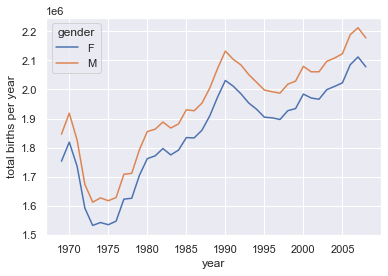

In [56]:
# %matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');



With a simple pivot table and plot() method, we can immediately see the annual trend in births by gender. By eye, it appears that over the past 50 years male births have outnumbered female births by around 5%


Further data exploration

Though this doesn't necessarily relate to the pivot table, there are a few more interesting features we can pull out of this dataset using the Pandas tools covered up to this point. We must start by cleaning the data a bit, removing outliers caused by mistyped dates (e.g., June 31st) or missing values (e.g., June 99th). One easy way to remove these all at once is to cut outliers; we'll do this via a robust sigma-clipping operation:


In [57]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])



In [58]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')



In [59]:
births['day'] = births['day'].astype(int)

In [60]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek



In [61]:
births

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5


C:\Users\USER\AppData\Local\Temp/ipykernel_7948/832003187.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


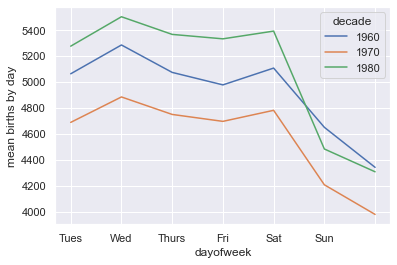

In [62]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

Apparently births are slightly less common on weekends than on weekdays! 
Note that the 1990s and 2000s are missing because the CDC data contains only the month of birth starting in 1989.

In [63]:


births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()



births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [64]:
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()



C:\Users\USER\AppData\Local\Temp/ipykernel_7948/281135688.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day)


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


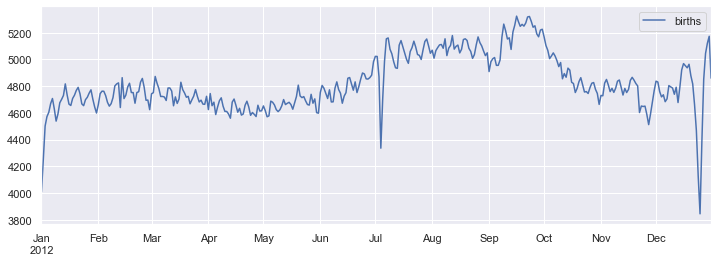

In [65]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

In [ ]:
# Getting and Knowing your Data

Step 2. Import the dataset from this : https://raw.githubusercontent.com/Source-lab1/Data-Analysis/main/data/u.user

Step 3. Assign it to a variable called users and use the 'user_id' as index

In [66]:
users = pd.read_csv('https://raw.githubusercontent.com/Source-lab1/Data-Analysis/main/data/u.user',sep='|',index_col='user_id')

Step 4. See the first 25 entries

In [70]:
users.head(25)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


Step 5. See the last 10 entries

In [71]:
users.tail(10)

,age,gender,occupation,zip_code
user_id,,,,
934,61,M,engineer,22902
935,42,M,doctor,66221
936,24,M,other,32789
937,48,M,educator,98072
938,38,F,technician,55038
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209


Step 6. What is the number of observations in the dataset?

In [73]:
users.shape[0]

943

Step 7. What is the number of columns in the dataset?

In [74]:
users.shape[1]

4

Step 8. Print the name of all the columns.

In [75]:
users.columns

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')

Step 9. How is the dataset indexed?

In [76]:
users.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)

Step 10. What is the data type of each column?

In [77]:
users.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

Step 11. Print only the occupation column

In [78]:
users.occupation

user_id
1         technician
2              other
3             writer
4         technician
5              other
           ...      
939          student
940    administrator
941          student
942        librarian
943          student
Name: occupation, Length: 943, dtype: object

In [79]:
users['occupation']

user_id
1         technician
2              other
3             writer
4         technician
5              other
           ...      
939          student
940    administrator
941          student
942        librarian
943          student
Name: occupation, Length: 943, dtype: object

Step 12. How many different occupations are in this dataset?

In [80]:
users.occupation.nunique()

21

Step 13. What is the most frequent occupation?

In [81]:
users.occupation.value_counts().head(1).index[0]

'student'

Step 14. Summarize the DataFrame

In [82]:
users.describe()

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


Step 15. Summarize all the columns

In [83]:
users.describe(include = "all")

,age,gender,occupation,zip_code
count,943.000000,943,943,943
unique,NaN,2,21,795
top,NaN,M,student,55414
freq,NaN,670,196,9
mean,34.051962,NaN,NaN,NaN
std,12.192740,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN


Step 16. Summarize only the occupation column

In [84]:
users.occupation.describe()

count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object

Step 17. What is the mean age of users?

In [85]:
round(users.age.mean())

34

In [86]:
Step 18. What is the age with least occurrence?

Object `occurrence` not found.


Step 18. What is the age with least occurrence

In [87]:
users.age.value_counts().tail()

7     1
66    1
11    1
10    1
73    1
Name: age, dtype: int64


# Working with Time Series

Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time-indexed data. Date and time data comes in a few flavors, which we will discuss here:


    * Time stamps reference particular moments in time (e.g., July 4th, 2015 at 7:00am).
    * Time intervals and periods reference a length of time between a particular beginning and end point; for example, the year       2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not        overlap (e.g., 24 hour-long periods comprising days).
    * Time deltas or durations reference an exact length of time (e.g., a duration of 22.56 seconds).


In [1]:
from datetime import datetime
datetime(year=2015, month=7, day=4)



datetime.datetime(2015, 7, 4, 0, 0)

Or, using the dateutil module, you can parse dates from a variety of string formats:

In [2]:
#"4th of July, 2015"
from dateutil import parser
date = parser.parse("4th of July, 2015")
date



datetime.datetime(2015, 7, 4, 0, 0)

Once you have a datetime object, you can do things like printing the day of the week:

In [3]:
date.strftime('%A')

'Saturday'

In [4]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date



array('2015-07-04', dtype='datetime64[D]')

In [5]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [6]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [7]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

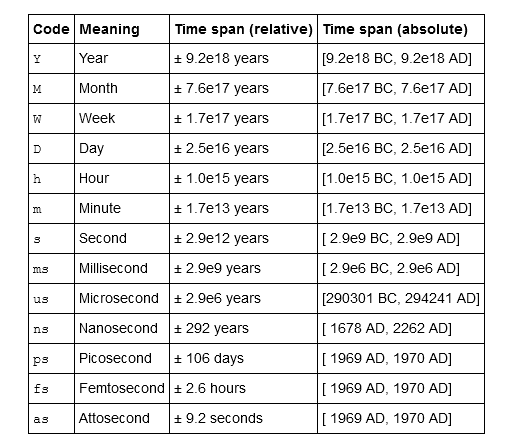

In [8]:


import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date



Timestamp('2015-07-04 00:00:00')

In [9]:
date.strftime('%A')

'Saturday'

In [10]:
date.strftime('%Y')

'2015'

In [11]:
date.strftime('%M')

'00'

In [13]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [14]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data



2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [15]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [17]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Pandas Time Series Data Structures

This section will introduce the fundamental Pandas data structures for working with time series data:

- For *time stamps*, Pandas provides the ``Timestamp`` type. As mentioned before, it is essentially a replacement for Python's native ``datetime``, but is based on the more efficient ``numpy.datetime64`` data type. The associated Index structure is ``DatetimeIndex``.
- For *time Periods*, Pandas provides the ``Period`` type. This encodes a fixed-frequency interval based on ``numpy.datetime64``. The associated index structure is ``PeriodIndex``.
- For *time deltas* or *durations*, Pandas provides the ``Timedelta`` type. ``Timedelta`` is a more efficient replacement for Python's native ``datetime.timedelta`` type, and is based on ``numpy.timedelta64``. The associated index structure is ``TimedeltaIndex``.

The most fundamental of these date/time objects are the ``Timestamp`` and ``DatetimeIndex`` objects.
While these class objects can be invoked directly, it is more common to use the ``pd.to_datetime()`` function, which can parse a wide variety of formats.
Passing a single date to ``pd.to_datetime()`` yields a ``Timestamp``; passing a series of dates by default yields a ``DatetimeIndex``:


In [18]:


dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates



DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [19]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [20]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences: ``pd.date_range()``

To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose: ``pd.date_range()`` for timestamps, ``pd.period_range()`` for periods, and ``pd.timedelta_range()`` for time deltas.
We've seen that Python's ``range()`` and NumPy's ``np.arange()`` turn a startpoint, endpoint, and optional stepsize into a sequence.
Similarly, ``pd.date_range()`` accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates.
By default, the frequency is one day:

In [21]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [22]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [23]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [24]:


pd.timedelta_range(0, periods=10, freq='H')



TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

| Code    | Description            || Code    | Description            |
|---------|------------------------||---------|------------------------|
| ``MS``  | Month start            ||``BMS``  | Business month start   |
| ``QS``  | Quarter start          ||``BQS``  | Business quarter start |
| ``AS``  | Year start             ||``BAS``  | Business year start    |

Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

- ``Q-JAN``, ``BQ-FEB``, ``QS-MAR``, ``BQS-APR``, etc.
- ``A-JAN``, ``BA-FEB``, ``AS-MAR``, ``BAS-APR``, etc.

In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:

- ``W-SUN``, ``W-MON``, ``W-TUE``, ``W-WED``, etc.

On top of this, codes can be combined with numbers to specify other frequencies.
For example, for a frequency of 2 hours 30 minutes, we can combine the hour (``H``) and minute (``T``) codes as follows:

In [25]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

All of these short codes refer to specific instances of Pandas time series offsets, which can be found in the pd.tseries.offsets module. For example, we can create a business day offset directly as follows:

In [27]:
from pandas.tseries.offsets import BDay
pd.date_range('2021-10-26', periods=5, freq=BDay())

DatetimeIndex(['2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29',
               '2021-11-01'],
              dtype='datetime64[ns]', freq='B')

## Resampling, Shifting, and Windowing

The ability to use dates and times as indices to intuitively organize and access data is an important piece of the Pandas time series tools.
The benefits of indexed data in general (automatic alignment during operations, intuitive data slicing and access, etc.) still apply, and Pandas provides several additional time series-specific operations.

We will take a look at a few of those here, using some stock price data as an example.
Because Pandas was developed largely in a finance context, it includes some very specific tools for financial data.
For example, the accompanying ``pandas-datareader`` package (installable via ``conda install pandas-datareader``), knows how to import financial data from a number of available sources, including Yahoo finance, Google Finance, and others.
Here we will load Google's closing price history:

In [32]:
!pip install pandas_datareader

You should consider upgrading via the 'C:\Users\USER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [36]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2022',
                       data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [37]:
goog = goog['Close']

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

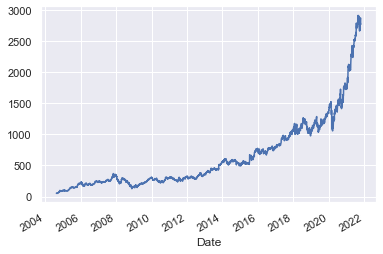

In [40]:
goog.plot();

In [41]:
goog.tail()

Date
2021-10-19    2876.439941
2021-10-20    2848.300049
2021-10-21    2855.610107
2021-10-22    2772.500000
2021-10-25    2775.459961
Name: Close, dtype: float64

### Resampling and converting frequencies

One common need for time series data is resampling at a higher or lower frequency.
This can be done using the ``resample()`` method, or the much simpler ``asfreq()`` method.
The primary difference between the two is that ``resample()`` is fundamentally a *data aggregation*, while ``asfreq()`` is fundamentally a *data selection*.

Taking a look at the Google closing price, let's compare what the two return when we down-sample the data.
Here we will resample the data at the end of business year:

In [42]:
goog.head(10)

Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-23    54.495735
2004-08-24    52.239197
2004-08-25    52.802086
2004-08-26    53.753517
2004-08-27    52.876804
2004-08-30    50.814533
2004-08-31    50.993862
2004-09-01    49.937820
Name: Close, dtype: float64

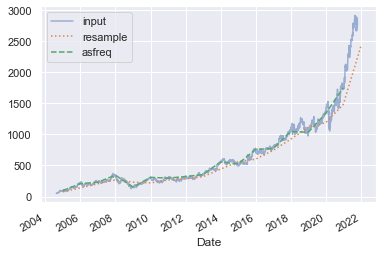

In [43]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

For up-sampling, ``resample()`` and ``asfreq()`` are largely equivalent, though resample has many more options available.
In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values.
Just as with the ``pd.fillna()`` function discussed previously, ``asfreq()`` accepts a ``method`` argument to specify how values are imputed.
Here, we will resample the business day data at a daily frequency (i.e., including weekends):

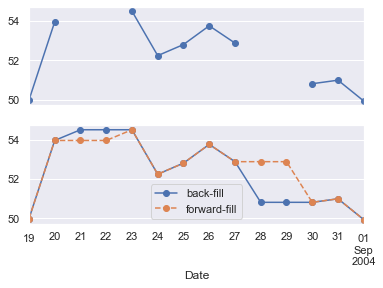

In [44]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

### Time-shifts

Another common time series-specific operation is shifting of data in time.
Pandas has two closely related methods for computing this: ``shift()`` and ``tshift()``
In short, the difference between them is that ``shift()`` *shifts the data*, while ``tshift()`` *shifts the index*.
In both cases, the shift is specified in multiples of the frequency.

Here we will both ``shift()`` and ``tshift()`` by 900 days; 

C:\Users\USER\AppData\Local\Temp/ipykernel_6936/1419339079.py:8: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


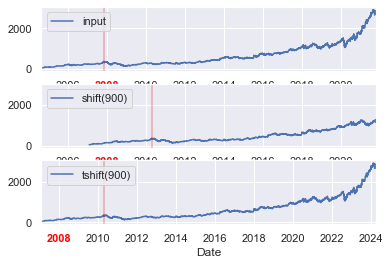

In [45]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

We see here that ``shift(900)`` shifts the *data* by 900 days, pushing some of it off the end of the graph (and leaving NA values at the other end), while ``tshift(900)`` shifts the *index values* by 900 days.

A common context for this type of shift is in computing differences over time. For example, we use shifted values to compute the one-year return on investment for Google stock over the course of the dataset:

C:\Users\USER\AppData\Local\Temp/ipykernel_6936/2632432407.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (goog.tshift(-365) / goog - 1)


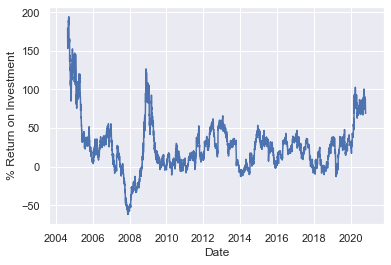

In [46]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

### Rolling windows

Rolling statistics are a third type of time series-specific operation implemented by Pandas.
These can be accomplished via the ``rolling()`` attribute of ``Series`` and ``DataFrame`` objects, which returns a view similar to what we saw with the ``groupby`` operation .
This rolling view makes available a number of aggregation operations by default.

For example, here is the one-year centered rolling mean and standard deviation of the Google stock prices:

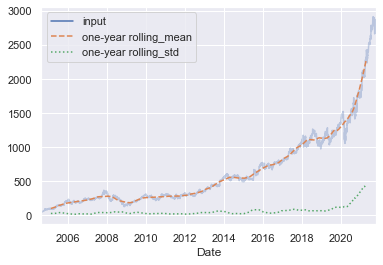

In [47]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)



In [49]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [50]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [52]:
data.columns = ['Total','East','West']


In [54]:
data.head()

,Total,East,West
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [55]:
data.dropna().describe()

,Total,East,West
count,144352.000000,144352.000000,144352.000000
mean,111.188013,50.529241,60.658772
std,141.260941,65.050403,87.812023
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,146.000000,68.000000,75.000000
max,1097.000000,698.000000,850.000000


In [56]:


%matplotlib inline
import seaborn; seaborn.set()



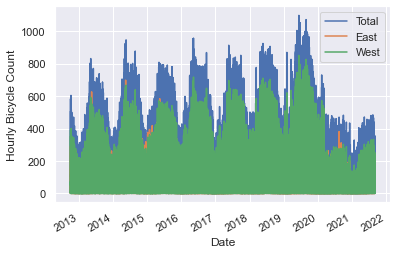

In [57]:


data.plot()
plt.ylabel('Hourly Bicycle Count');



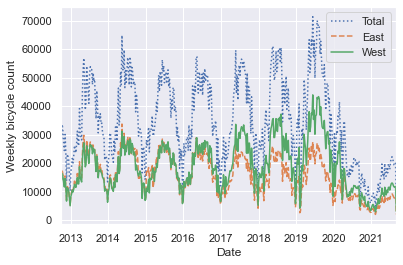

In [58]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

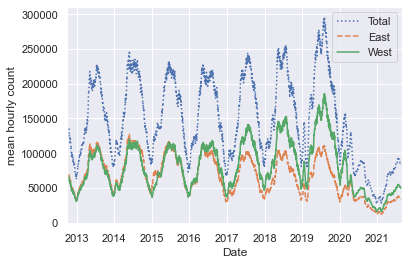

In [59]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');



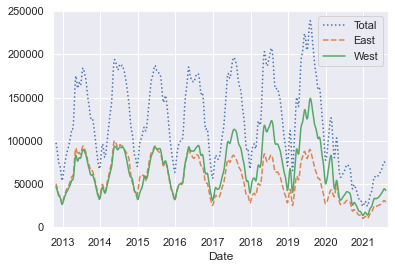

In [60]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

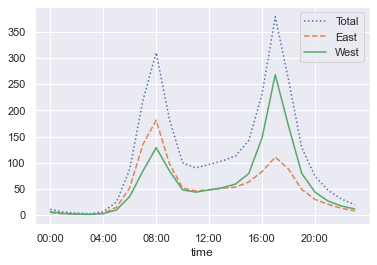

In [61]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);



The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening. This is likely evidence of a strong component of commuter traffic crossing the bridge. This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:


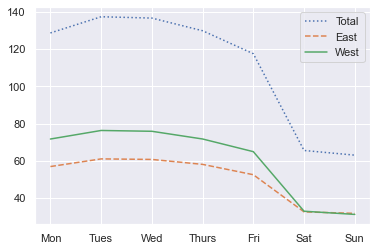

In [62]:


by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);



In [63]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()



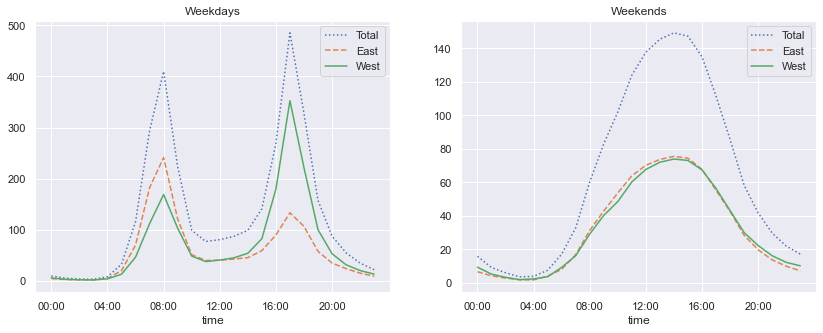

In [65]:


import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

